# Dataset Understanding

This dataset contains reviews of the top 10 rated airlines in 2023 sourced from the Airline Quality (https://www.airlinequality.com) website. The reviews cover various aspects of the flight experience, including seat comfort, staff service, food and beverages, inflight entertainment, value for money, and overall rating.

# **List of Airlines**

1. Singapore Airlines
2. Qatar Airways
3. All Nippon Airways
4. Emirates
5. Japan Airlines
6. Turkish Airlines
7. Air France
8. Cathay Pacific Airways
9. EVA Air
10. Korean Air


|Variable                       |Description |
|:------------------------------|:-----------|
Title 			|Title of the review
Name 		|Name of reviewer
Review Date 		|The date when the review was posted
Airline			|The airline being reviewed
Verified			|Indicates whether the review is verified (True or False)
Review 		|The main text of the review
Type of Traveler	|Type of traveler (e.g., Solo Leisure, Family Leisure, Business)
Month Flown	|The month when the flight was taken
Route		|The route of the flight
Class 		|The class of service (e.g., Economy Class, Business Class)
Seat Comfort		|Rating for seat comfort
Staff Service			|Rating for staff service
Food & Beverages 		|Rating for food and beverages
Inflight Entertaiment 		|Rating for inflight entertainment
Value For Money 		|Rating for value for money
Overall Rating 		|Overall rating given by the reviewer
Recommended   |Indicates whether the reviewer would recommend the airline (Yes or No)

# Data Preparation
1. Import library
2. Install & download package
3. Import dataset

In [ ]:
# import necessary library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [ ]:
# install & donwload NLTK package

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
df = pd.read_csv('airlines_reviews.csv')

pd.set_option('display.max_columns', None)

df.head()

,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended
0,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes
1,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no
2,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes
3,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes
4,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes


In [ ]:
df.shape

(8100, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   8100 non-null   object
 1   Name                    8100 non-null   object
 2   Review Date             8100 non-null   object
 3   Airline                 8100 non-null   object
 4   Verified                8100 non-null   object
 5   Reviews                 8100 non-null   object
 6   Type of Traveller       8100 non-null   object
 7   Month Flown             8100 non-null   object
 8   Route                   8100 non-null   object
 9   Class                   8100 non-null   object
 10  Seat Comfort            8100 non-null   int64 
 11  Staff Service           8100 non-null   int64 
 12  Food & Beverages        8100 non-null   int64 
 13  Inflight Entertainment  8100 non-null   int64 
 14  Value For Money         8100 non-null   int64 
 15  Over

In [ ]:
df.describe()

,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating
count,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000,8100.000000
mean,3.414815,3.569877,3.384074,3.636790,3.148642,5.632469
std,1.397183,1.527436,1.455694,1.309564,1.589377,3.523664
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,3.000000,6.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000


# Data Cleaning & Transforming

In [ ]:
# change review date from object into date

df['Review Date'] = pd.to_datetime(df['Review Date'], errors='coerce', format=None)

# add year column, extracting from review date

df['year'] = df['Review Date'].dt.year

# NLTK

Checking if it works well by using sample

In [ ]:
# pick one row from dataset

sample = df['Reviews'][40]
sample

'  Very poor service, was told not to take my cabin luggage onto business class, but all the bags in the plane including economy were bigger. Cabin crew brought the wrong dinner and basically told me to eat it, only replaced when I did not. Seat not able to got flat, very poor seating configuration for someone over 6’.'

In [ ]:
# divide the review from 1 sentence to per word

tokens = nltk.word_tokenize(sample)[:10]
tokens

['Very', 'poor', 'service', ',', 'was', 'told', 'not', 'to', 'take', 'my']

In [ ]:
tag = nltk.pos_tag(tokens)
tag

[('Very', 'RB'),
 ('poor', 'JJ'),
 ('service', 'NN'),
 (',', ','),
 ('was', 'VBD'),
 ('told', 'VBN'),
 ('not', 'RB'),
 ('to', 'TO'),
 ('take', 'VB'),
 ('my', 'PRP$')]

In [ ]:
entities = nltk.chunk.ne_chunk(tag)
entities.pprint()

(S
  Very/RB
  poor/JJ
  service/NN
  ,/,
  was/VBD
  told/VBN
  not/RB
  to/TO
  take/VB
  my/PRP$)


#VADER Scoring

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores(sample)

{'neg': 0.168, 'neu': 0.832, 'pos': 0.0, 'compound': -0.8987}

In [ ]:
# Polarity score for entire dataset

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Reviews']
    index = i
    res[index] = sia.polarity_scores(text)

  0%|          | 0/8100 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T

vaders = vaders.merge(df, left_index=True, right_index=True, how='left')

In [ ]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
vaders['Analysis'] = vaders['compound'].apply(vader_analysis)

vaders.head()

,neg,neu,pos,compound,Title,Name,Review Date,Airline,Verified,Reviews,Type of Traveller,Month Flown,Route,Class,Seat Comfort,Staff Service,Food & Beverages,Inflight Entertainment,Value For Money,Overall Rating,Recommended,year,Analysis
0,0.000,0.738,0.262,0.9755,Flight was amazing,Alison Soetantyo,2024-03-01,Singapore Airlines,True,Flight was amazing. The crew onboard this fl...,Solo Leisure,December 2023,Jakarta to Singapore,Business Class,4,4,4,4,4,9,yes,2024,Positive
1,0.307,0.600,0.093,-0.8957,seats on this aircraft are dreadful,Robert Watson,2024-02-21,Singapore Airlines,True,Booking an emergency exit seat still meant h...,Solo Leisure,February 2024,Phuket to Singapore,Economy Class,5,3,4,4,1,3,no,2024,Negative
2,0.000,0.802,0.198,0.7506,Food was plentiful and tasty,S Han,2024-02-20,Singapore Airlines,True,Excellent performance on all fronts. I would...,Family Leisure,February 2024,Siem Reap to Singapore,Economy Class,1,5,2,1,5,10,yes,2024,Positive
3,0.000,0.869,0.131,0.9621,“how much food was available,D Laynes,2024-02-19,Singapore Airlines,True,Pretty comfortable flight considering I was f...,Solo Leisure,February 2024,Singapore to London Heathrow,Economy Class,5,5,5,5,5,10,yes,2024,Positive
4,0.000,0.718,0.282,0.9523,“service was consistently good”,A Othman,2024-02-19,Singapore Airlines,True,The service was consistently good from start ...,Family Leisure,February 2024,Singapore to Phnom Penh,Economy Class,5,5,5,5,5,10,yes,2024,Positive


# Questions

1. How each airline rated? Are all passengers happy with their trip?
2. What is the Reviews of flights from 2016 to 2024? Does it better or worse?
3. What about the flight class? Does each class have a different assessment?
4. How about services when flying? Are they satisfied with airline services?
5. What is the most kind type of traveler that give review?
6. What about the rating for each type of traveler?

# VADER Plot Result | Exploratory Data Analysis

##**Reviews Count**

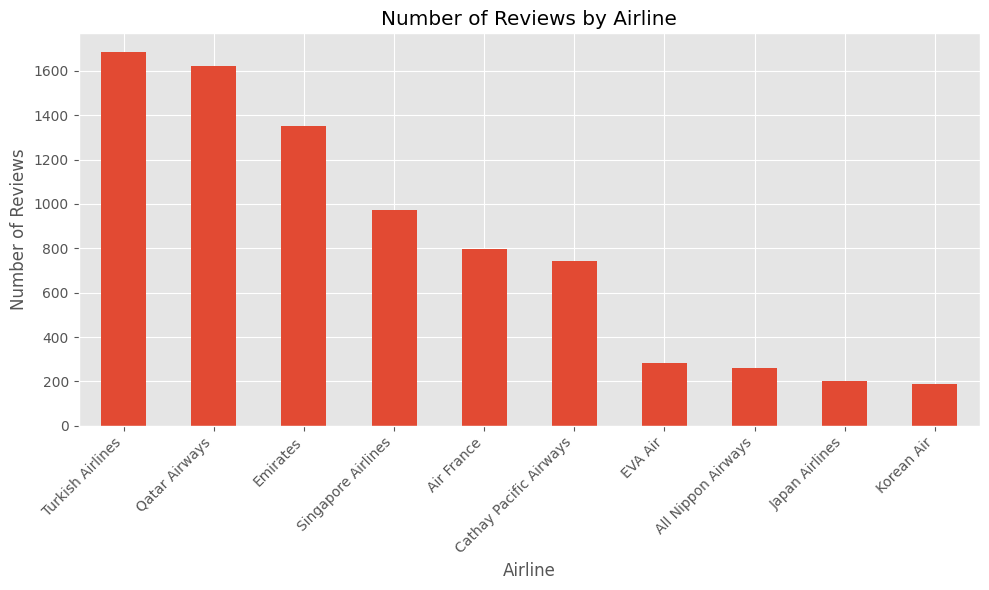

In [ ]:
airline_counts = vaders['Airline'].value_counts()

# Bar chart for number of reviews by airline
plt.figure(figsize=(10, 6))
airline_counts.plot(kind='bar')
plt.title('Number of Reviews by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Most count reviews: Turkish Ailine, Qatar Airways, Emirates
- Medium count reviews: Singapore Airlines, Air Frace, Cathay Pacific Airways
- Least count reviews: EVA Air, All Nippon Airways, Japan Airlines, Korean Air

##**Rating Analysis**

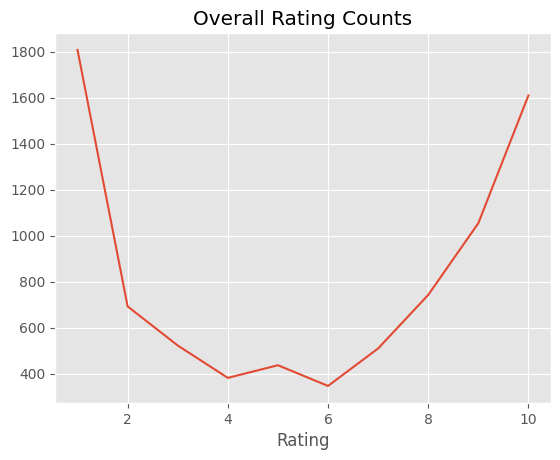

In [ ]:
ax = vaders['Overall Rating'].value_counts()\
    .sort_index()\
    .plot(kind='line', rot=0, title='Overall Rating Counts')
ax.set_xlabel('Rating')
plt.show()

- 1 star rating is the most count reviews

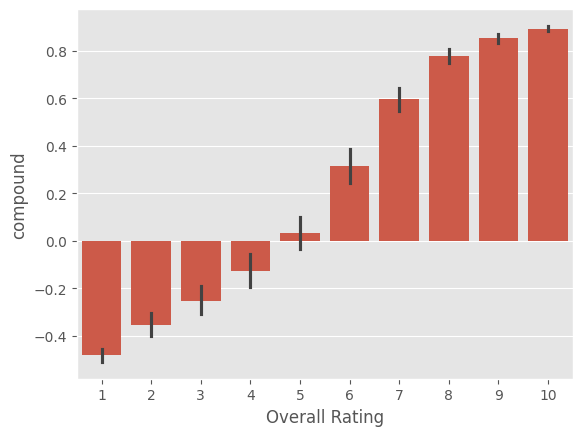

In [ ]:
sns.barplot(data=vaders, x = 'Overall Rating', y ='compound')
ax.set_xlabel('Overall Rating')
plt.show()

- Although the number of rating 1 is higher, looks like it is balanced.
- But when viewed based on the scale, it appears that there are more positive reponses (5 - 10 rating)
- The responds of 1 star rating is not too bad

##**Sentiment**

In [ ]:
analysis = vaders['Analysis'].value_counts()
analysis

Positive    4498
Negative    3024
Neutral      578
Name: Analysis, dtype: int64

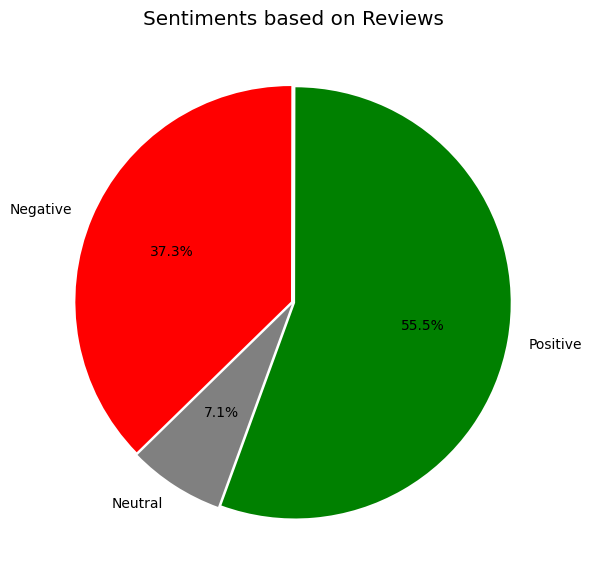

In [ ]:
plt.figure(figsize=(25,7))
plt.subplot(1,3,2)
plt.title("Sentiments based on Reviews")
plt.pie(analysis.values,
        labels = analysis.index,
        explode = (0.01, 0.01, 0.01),
        autopct='%1.1f%%',
        shadow=False,
        colors=("green", "red", "gray"),
        startangle=250)
plt.show()

Half of traveler are happy with their trip, with detail:
<br>
- 55.5% give positive respons
- 37.3 give negative respons
- 7.1% give neutral respons

In [ ]:
sent = vaders.groupby('Airline')['Analysis'].value_counts().unstack(fill_value=0)
sent = sent.reset_index()

sent.columns = ['Airline', 'Negative', 'Neutral', 'Positive']
sent

,Airline,Negative,Neutral,Positive
0,Air France,370,57,371
1,All Nippon Airways,40,12,206
2,Cathay Pacific Airways,235,46,463
3,EVA Air,56,9,216
4,Emirates,617,114,619
5,Japan Airlines,45,10,146
6,Korean Air,42,17,128
7,Qatar Airways,347,125,1152
8,Singapore Airlines,272,71,629
9,Turkish Airlines,1000,117,568


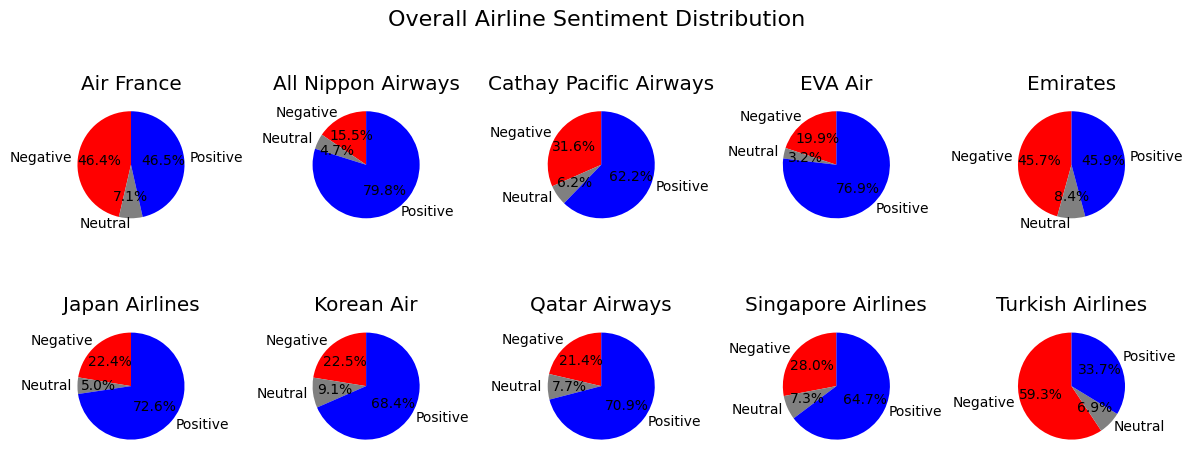

In [ ]:
# Define the number of rows and columns for the subplot
rows, cols = 2, 5

# Create a color mapping dictionary
color_map = {'Negative': 'red', 'Neutral': 'gray', 'Positive': 'blue'}

# Create the figure and subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 5))  # Adjust figsize for better visualization

# Iterate through each airline and create a pie chart in a subplot
for i, row in sent.iterrows():
    airline = row['Airline']
    negative, neutral, positive = row['Negative'], row['Neutral'], row['Positive']

    # Select the appropriate subplot for the current airline
    ax = axes[i // cols, i % cols]

    # Create the pie chart
    ax.pie([negative, neutral, positive],
           labels=['Negative', 'Neutral', 'Positive'],
           autopct='%1.1f%%',
           startangle=90,
            colors=color_map.values())
    ax.set_title(airline)  # Set the title of the subplot as the airline name

plt.suptitle('Overall Airline Sentiment Distribution', fontsize=16)

plt.tight_layout()
plt.show()

- 7 airlines mostly have positive reviews
<br>
(All Nippon Airways, Cathca Pacific Airways, EVA Air, Japan Airlines, Korean Air, Qatar Airways, Singapore Airline)


---


- 2 airline has balanced positive and negative reviews
<br>
(Air France, Emirates)


---


- 1 airline mostly has negative reviews
<br>
(Turkish Airlines)

**Observation:**
<br>
If we look at it, Turkish Airline has quite a lot of negative reviews while they have 1600 reviews.
<br>This can explain why there are so many 1-star reviews on the first chart.

##**Rating Over Year**

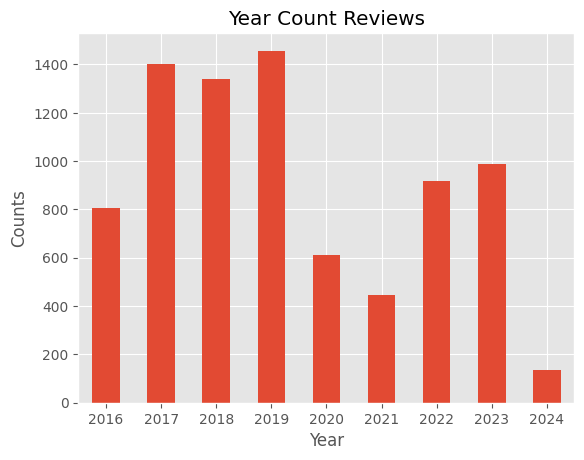

In [ ]:
ax = vaders['year'].value_counts()\
    .sort_index()\
    .plot(kind='bar', rot=0, title='Year Count Reviews')
ax.set_xlabel('Year')
ax.set_ylabel('Counts')
plt.show()

In [ ]:
year_rating = vaders.groupby('year', as_index=False)['Overall Rating'].mean().sort_index()
year_rating

,year,Overall Rating
0,2016,6.861042
1,2017,6.652857
2,2018,5.769747
3,2019,5.374743
4,2020,5.040850
5,2021,4.671171
6,2022,4.762009
7,2023,5.080041
8,2024,4.926471


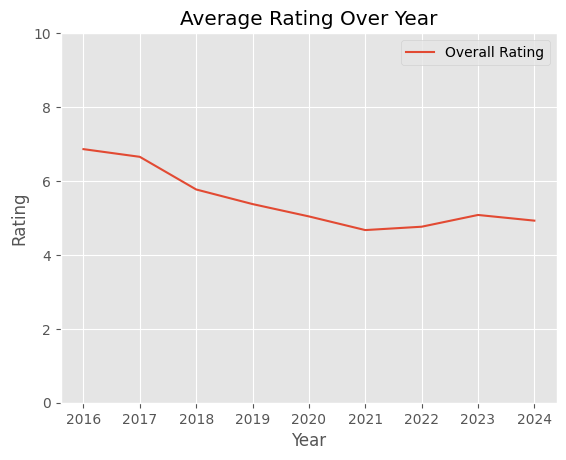

In [ ]:
min = 0
max = 10

ax = year_rating.plot(kind = 'line',
                      x = 'year',
                      y= 'Overall Rating',
                      title='Average Rating Over Year')
ax.set_xlabel('Year')
ax.set_ylabel('Rating')
ax.set_ylim(min, max)

plt.show()

- Rating constantly decrease from 2017 to 2021
- Increased a little bit from 2022 to 2024

##**Rating by Class**

In [ ]:
class_rating = vaders.groupby('Class')['Overall Rating'].mean().sort_values()
class_rating

Class
Economy Class      5.177326
Premium Economy    5.967655
Business Class     6.650665
First Class        7.603306
Name: Overall Rating, dtype: float64

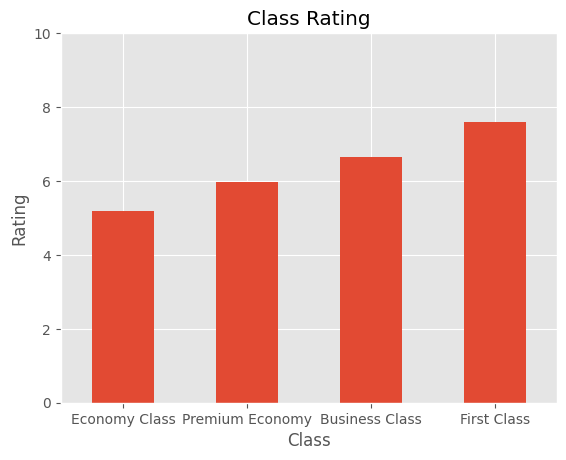

In [ ]:
min = 0
max = 10

ax = class_rating.plot(kind='bar',
                       rot= 0,
                       title='Class Rating')
ax.set_xlabel('Class')
ax.set_ylabel('Rating')
ax.set_ylim(min, max)

plt.show()

- **Economy Class** is the worst rating, while **First Class** is the best rating

##**Services Rating**

In [ ]:
services = vaders[['Seat Comfort','Staff Service','Food & Beverages','Inflight Entertainment']].mean()
services

Seat Comfort              3.414815
Staff Service             3.569877
Food & Beverages          3.384074
Inflight Entertainment    3.636790
dtype: float64

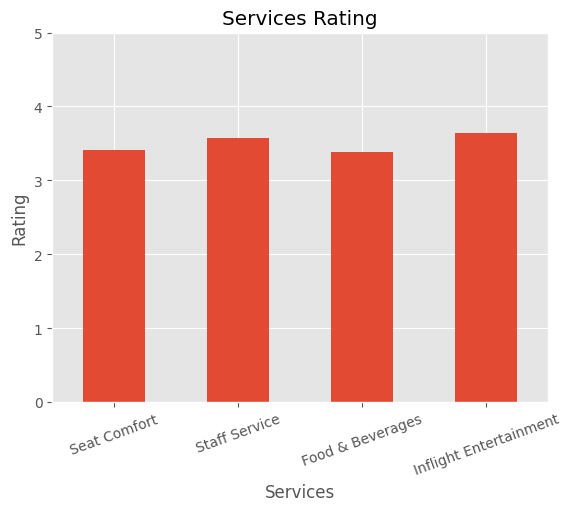

In [ ]:
min = 0
max = 5

ax = services.plot(kind='bar',
                       rot= 20,
                       title='Services Rating')
ax.set_xlabel('Services')
ax.set_ylabel('Rating')
ax.set_ylim(min, max)

plt.show()

##**Type of Traveler**

<Axes: >

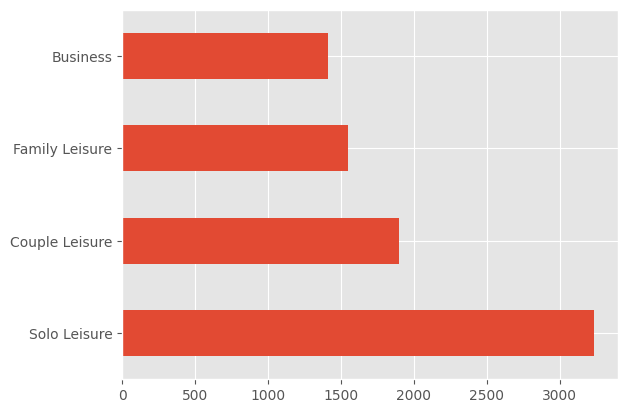

In [ ]:
vaders['Type of Traveller'].value_counts()\
.plot(kind='barh')

- Solo traveller give the most reviews

In [ ]:
tot = vaders.groupby('Type of Traveller')['Overall Rating'].value_counts().unstack(fill_value=0)
tot = tot.T

tot.columns = ['Business', 'Couple', 'Family', 'Solo']
tot = tot.reset_index()
tot

,Overall Rating,Business,Couple,Family,Solo
0,1,315,406,460,627
1,2,123,183,150,236
2,3,114,128,100,180
3,4,77,117,60,127
4,5,90,118,64,164
5,6,74,86,48,138
6,7,86,123,82,218
7,8,130,171,109,332
8,9,190,230,169,465
9,10,214,337,309,750


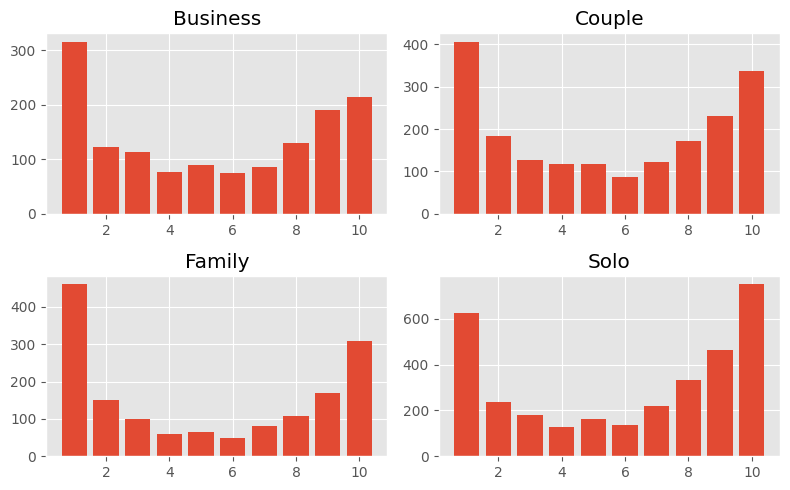

In [ ]:
# Get number of columns for subplot layout
num_cols = 2  # Set the number of columns to 2

# Create a figure with 2 rows and num_cols columns, set figsize
fig, axes = plt.subplots(2, num_cols, figsize=(8, 5))  # Adjust figsize for better visualization

# Plot each column on a separate subplot, using 'Overall Rating' as x and same y-axis limits
for i, col in enumerate(tot.columns[1:]):
    row = int(i / num_cols)  # Calculate row index based on column index and number of columns
    col_index = i % num_cols  # Calculate column index within the subplot

    axes[row, col_index].bar(tot['Overall Rating'], tot[col])  # Use 'Overall Rating' for x-axis
    axes[row, col_index].set_title(col)

# Adjust layout to prevent overlapping labels
plt.tight_layout()

plt.show()



- Of all types of traveler types, all of them have many ratings on the 1 star and followed by 10 star

# Insight



1. The total rating value given is like an **inverted curve**, where the most is **1** and **10**. The cause of many low ratings can be caused by various factors, such as related to the **value of services that are all at a 3-star value**.
2. Also **rating per year got decrease**. If considering 2019, then **COVID-19** can affect the quality of service on flights.
3. Based on the sentiment review, **Turkish Airline is the worst** among the other 9.
4. The rating is very influential on the class of flight. **The higher the class of flight, the better the rating**, of course because of the convenience and better quality of service.
5. Type of traveler is not very influential, because all traveler categories have a high rating value of 1.
